# Practice notebook for confidence intervals using NHANES data

This notebook will give you the opportunity to practice working with confidence intervals using the NHANES data.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

url = "https://raw.githubusercontent.com/kshedden/statswpy/master/NHANES/merged/nhanes_2015_2016.csv"
da = pd.read_csv(url)

da["RIAGENDRx"] = da.RIAGENDR.replace({1: 'Male', 2: "Female"})

## Question 1

Restrict the sample to women between 35 and 50, then use the marital status variable [DMDMARTL](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDMARTL) to partition this sample into two groups - women who are currently married, and women who are not currently married.  Within each of these groups, calculate the proportion of women who have completed college.  Calculate 95% confidence intervals for each of these proportions.

In [2]:
print(da.shape)

(5735, 29)


In [3]:
da["DMDMARTLx"] = da.DMDMARTL.replace({1: "Married", 2: "Widowed", 3: "Divorced",
                         4: "Separated", 5: "Never married", 6: "Living with partner", 77: np.nan, 99: np.nan})

In [4]:
married = da[(da['DMDMARTLx'] == 'Married')&(da['RIAGENDRx'] == 'Female')&(da['RIDAGEYR']>=35)&(da['RIDAGEYR']<=50)]
notmarried = da[(da['DMDMARTLx'] != 'Married')&(da['RIAGENDRx'] == 'Female')&(da['RIDAGEYR']>=35)&(da['RIDAGEYR']<=50)]

prop_cc_married = (married['DMDEDUC2'] == 5).mean()
prop_cc_notmarried = (notmarried['DMDEDUC2'] == 5).mean()

print("The Proportion of College Completion for Married Women between 35 and 50 is:", round(prop_cc_married, 3))
print("The Proportion of College Completion for Not Currently Married Women between 35 and 50 is:", round(prop_cc_notmarried.mean(), 3))

The Proportion of College Completion for Married Women between 35 and 50 is: 0.361
The Proportion of College Completion for Not Currently Married Women between 35 and 50 is: 0.213


In [5]:
#CI for Married College Completion

p = prop_cc_married
n = len(married)
lcb = p - 1.96 * np.sqrt(p * (1 - p) / n)  
ucb = p + 1.96 * np.sqrt(p * (1 - p) / n)

print("95% CI for Married College Completion")
print((lcb,ucb))
print(abs(lcb - ucb))
print(n, p)

95% CI for Married College Completion
(0.3163811208674688, 0.4052224426069187)
0.08884132173944992
449 0.36080178173719374


In [6]:
#Routinely, the above can be performed with the statsmodel library.
sm.stats.proportion_confint(n*p, n)  

(0.31638193710753626, 0.4052216263668512)

In [7]:
#CI for Not Currently Married College Completion

p = prop_cc_notmarried
n = len(notmarried)
print("95% CI for Not Currently Married College Completion")
print(sm.stats.proportion_confint(n*p, n))
lcb, ucb = sm.stats.proportion_confint(n*p, n)
print(ucb - lcb)
print(n, p)

95% CI for Not Currently Married College Completion
(0.16936816767089768, 0.2566673352876822)
0.08729916761678452
338 0.21301775147928995


__Q1a.__ Identify which of the two confidence intervals is wider, and explain why this is the case. 

The confidence interview for the Married women is slightly higher. The difference in intervals comes from the difference in the total number of individuals and the different proportions of college completion in each demographic.

__Q1b.__ Write 1-2 sentences summarizing these findings for an audience that does not know what a confidence interval is (the goal here is to report the substance of what you learned about how marital status and educational attainment are related, not to teach a person what a confidence interval is).

We are 95% confident that the proportion of college completion for married women between the ages of 35 and 50 is between (0.3163811208674688, 0.4052224426069187).

We are 95% confident that the true proportion of college completion for not-currently-married women between the ages of 35 and 50 is between (0.1693673655848136, 0.25666813737376626).

## Question 2

Construct a 95% confidence interval for the proportion of smokers who are female. Construct a 95% confidence interval for the proportion of smokers who are male. Construct a 95% confidence interval for the **difference** between those two gender proportions.

In [8]:
da["SMQ020x"] = da.SMQ020.replace({1: "Yes", 2: "No", 7: np.nan, 9: np.nan})  # np.nan represents a missing value

#Female 95% CI
n1 = sum((da.RIAGENDRx == "Female")& (da.SMQ020x.notna()))
p = sum((da.RIAGENDRx == "Female")& (da.SMQ020x == "Yes")) / n1
se_female = np.sqrt(p * (1 - p) / n1)
print(sm.stats.proportion_confint(n*p, n1))

#Male 95% CI
n2 = sum((da.RIAGENDRx == "Male")& (da.SMQ020x.notna()))
p = sum((da.RIAGENDRx == "Male")& (da.SMQ020x == "Yes")) / n2
se_male = np.sqrt(p * (1 - p) / n2)
print(sm.stats.proportion_confint(n*p, n2))

#Difference 95% CI
se_diff = np.sqrt(se_female**2 + se_male**2)
d = (sum((da.RIAGENDRx == "Female")& (da.SMQ020x == "Yes")) / n1) - (sum((da.RIAGENDRx == "Male")& (da.SMQ020x == "Yes")) / n2)
lcb = d - 2*se_diff
ucb = d + 2*se_diff
print("95% Difference CIs:", ((lcb, ucb)))

(0.028092363073832775, 0.04124659053354628)
(0.05393852757667955, 0.07209219754846546)
95% Difference CIs: (-0.2338728044024504, -0.18295327887682067)


__Q2a.__ Why might it be relevant to report the separate gender proportions **and** the difference between the gender proportions?

Gender-based dependency of the data could hide some important trends through averaging them. Calculating the difference CIs shows us here that we are 95% confident that there is difference between the two categories in smoker proportions.

__Q2b.__ How does the **width** of the confidence interval for the difference between the gender proportions compare to the widths of the confidence intervals for the separate gender proportions?

In [9]:
print(abs(0.2879023206749516 - 0.3209686470669839))
print(abs(0.4934902211293819 - 0.5307939397984904))
print(abs(0.2331398958124142 - 0.18227329737352263))

0.03306632639203233
0.03730371866910853
0.050866598438891575


The width of the confidence interval for the difference between the gender proportions is wider than either of the gender categories as there is always more variability in the calculation, reflecting less precision for the same degree of confidence.

## Question 3

Construct a 95% interval for height ([BMXHT](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXHT)) in centimeters.  Then convert height from centimeters to inches by dividing by 2.54, and construct a 95% confidence interval for height in inches.  Finally, convert the endpoints (the lower and upper confidence limits) of the confidence interval from inches to back to centimeters   

In [10]:
#95% interval for height (BMXHT) in centimeters
da.BMXHT.dropna(inplace=True)
print(sm.stats.DescrStatsW(da.BMXHT).zconfint_mean())

#95% interval for height (BMXHT) in inches
inches = da.BMXHT / 2.54
print(sm.stats.DescrStatsW(inches).zconfint_mean())

#95% interval for height (BMXHT) from inches to centimeters
cm = inches * 2.54
print(sm.stats.DescrStatsW(cm).zconfint_mean())

(nan, nan)
(nan, nan)
(nan, nan)


__Q3a.__ Describe how the confidence interval constructed in centimeters relates to the confidence interval constructed in inches.

The endpoint values of the lower and upper confidence intervals are divided by the 2.54 cm to inches conversion, 
ie (165.88055125872887, 166.40511769949427) / 2.54 = (65.30730364516884, 65.51382586594264).

## Question 4

Partition the sample based on 10-year age bands, i.e. the resulting groups will consist of people with ages from 18-28, 29-38, etc. Construct 95% confidence intervals for the difference between the mean BMI for females and for males within each age band.

__Q4a.__ How do the widths of these confidence intervals differ?  Provide an explanation for any substantial diferences in the confidence interval widths that you see.

In [11]:
for val in [[18, 28], [29, 38], [39, 48], [49, 58], [59, 68], [69, 78], [79, 88]]:
    da_year_band=da[(da['RIDAGEYR']>=val[0])&(da['RIDAGEYR']<=val[1])]
    
    bmi_males=da_year_band[da_year_band['RIAGENDR']==1]['BMXBMI']
    bmi_females=da_year_band[da_year_band['RIAGENDR']==2]['BMXBMI']
    
    bmi_males=bmi_males.dropna()
    bmi_females=bmi_females.dropna()
    
    bmi_males_temp=sm.stats.DescrStatsW(bmi_males)
    bmi_females_temp=sm.stats.DescrStatsW(bmi_females)
    
    cm = sm.stats.CompareMeans(bmi_males_temp, bmi_females_temp)
    lower, upper=cm.tconfint_diff(usevar='pooled')
    print(val)
    print("Female Average:", bmi_females.mean())
    print("Female Std:", bmi_females.std(), "\n")

    print("Male Average:", bmi_males.mean())
    print("Male Std:", bmi_males.std(), "\n")

    print("pooled: ", ((lower, upper)))
    if lower < 0 and upper < 0:
        print("pooled width: ", (upper - lower))
    elif lower > 0 and upper > 0:
        print("pooled width: ", (upper - lower))
    else:
        print("pooled width: ", abs(upper)+abs(lower))
    
    print("")
    print("Significant at 95% level?")
    if lower <= 0 <= upper: print("No")
    else: print("Yes")
    print('---------------------------------------------------------------------------------------\n')

[18, 28]
Female Average: 27.822775800711735
Female Std: 7.960990952854273 

Male Average: 26.969514563106834
Male Std: 6.7794366607443335 

pooled:  (-1.7413396392274145, 0.03481716401752033)
pooled width:  1.7761568032449349

Significant at 95% level?
No
---------------------------------------------------------------------------------------

[29, 38]
Female Average: 29.943442622950815
Female Std: 7.95909705345726 

Male Average: 29.697180043383963
Male Std: 6.726690240807493 

pooled:  (-1.1877114002496492, 0.6951862411158937)
pooled width:  1.8828976413655427

Significant at 95% level?
No
---------------------------------------------------------------------------------------

[39, 48]
Female Average: 31.003732809430268
Female Std: 8.044642040902996 

Male Average: 29.51464646464647
Male Std: 6.104950274111975 

pooled:  (-2.443853349014053, -0.534319340553526)
pooled width:  1.909534008460527

Significant at 95% level?
Yes
-------------------------------------------------------------

The substantial differences are considered the ones statistically significant at the 95% level, indicating zero is outside of the confidence intervals. There is a pattern to this and to explain it uses outside knowledge. However, we can see that from the 39- to -78 age blocks, women have a higher BMI than men in this dataset, though the sample mean difference at every level is consistently around 2 units higher for women.

## Question 5

Construct a 95% confidence interval for the first and second systolic blood pressure measures, and for the difference between the first and second systolic blood pressure measurements within a subject.

In [12]:
first_sbp=da['BPXSY1']
second_sbp=da['BPXSY2']
sbp_diff=first_sbp-second_sbp

first_sbp=first_sbp.dropna()
second_sbp=second_sbp.dropna()
sbp_diff=sbp_diff.dropna()

In [13]:
da['BPXSY1'].isna().sum()

334

In [14]:
da['BPXSY2'].isna().sum()

200

In [15]:
lower, upper=sm.stats.DescrStatsW(first_sbp).tconfint_mean()
print("First SBP")
print("95% CI:", ((lower, upper)))
if lower < 0 and upper < 0:
    print("diff:", (upper - lower))
elif lower > 0 and upper > 0:
    print("diff:", (upper - lower))
else:
    print("diff:", abs(upper)+abs(lower))

First SBP
95% CI: (124.59163222328895, 125.57759569746646)
diff: 0.9859634741775096


In [16]:
lower, upper=sm.stats.DescrStatsW(second_sbp).tconfint_mean()
print("Second SBP")
print("95% CI:", ((lower, upper)))
if lower < 0 and upper < 0:
    print("diff:", (upper - lower))
elif lower > 0 and upper > 0:
    print("diff:", (upper - lower))
else:
    print("diff:", abs(upper)+abs(lower))

Second SBP
95% CI: (124.29482629577244, 125.27120803123749)
diff: 0.9763817354650541


In [17]:
lower, upper=sm.stats.DescrStatsW(sbp_diff).tconfint_mean()
print("Difference")
print("95% CI:", ((lower, upper)))
if lower < 0 and upper < 0:
    print("diff:", (upper - lower))
elif lower > 0 and upper > 0:
    print("diff:", (upper - lower))
else:
    print("diff:", abs(upper)+abs(lower))

Difference
95% CI: (0.5399696008802797, 0.8100024609561889)
diff: 0.2700328600759092


__Q5a.__ Based on these confidence intervals, would you say that a difference of zero between the population mean values of the first and second systolic blood pressure measures is consistent with the data?

Based on our 95% confidence interval, a true difference between the population mean values of the first and second systolic blood pressure measures is not consistent with the data as zero falls outside the boundaries of the confidence interval.

__Q5b.__ Discuss how the width of the confidence interval for the within-subject difference compares to the widths of the confidence intervals for the first and second measures.

The widths are almost equivalent. The difference comes from the difference of the total number of samples, with the difference in totals resulting from a difference in null values as demonstrated below.

In [18]:
print(da['BPXSY1'].isna().sum())
print(da['BPXSY2'].isna().sum())

334
200


## Question 6

Construct a 95% confidence interval for the mean difference between the average age of a smoker, and the average age of a non-smoker.

In [19]:
smokers_age = da[da['SMQ020x']=='Yes']['RIDAGEYR']
nonsmokers_age = da[da['SMQ020x']=='No']['RIDAGEYR']

#Getting statistical information for packaged use in statsmodel.stats.CompareMeans()
smokers_age_stats=sm.stats.DescrStatsW(smokers_age)
nonsmokers_age_stats=sm.stats.DescrStatsW(nonsmokers_age)

cm = sm.stats.CompareMeans(smokers_age_stats, nonsmokers_age_stats)
lower, upper=cm.tconfint_diff(usevar = 'unequal')

print("Avg smokers age: ", smokers_age.mean())
print("Avg Non-smoker age: ", nonsmokers_age.mean())
print("95% CI diff:", ((lower, upper)))

Avg smokers age:  52.09659335920655
Avg Non-smoker age:  45.259835584263065
95% CI diff: (5.891617113853669, 7.781898436033303)


__Q6a.__ Use graphical and numerical techniques to compare the variation in the ages of smokers to the variation in the ages of non-smokers.  

In [20]:
smokers_age.describe()

count    2319.000000
mean       52.096593
std        17.461141
min        18.000000
25%        37.000000
50%        54.000000
75%        66.000000
max        80.000000
Name: RIDAGEYR, dtype: float64

In [21]:
nonsmokers_age.describe()

count    3406.000000
mean       45.259836
std        18.543286
min        18.000000
25%        29.000000
50%        44.000000
75%        60.000000
max        80.000000
Name: RIDAGEYR, dtype: float64

[Text(0.5, 0, 'Smoker Attribute'), Text(0, 0.5, 'Age of Respondent')]

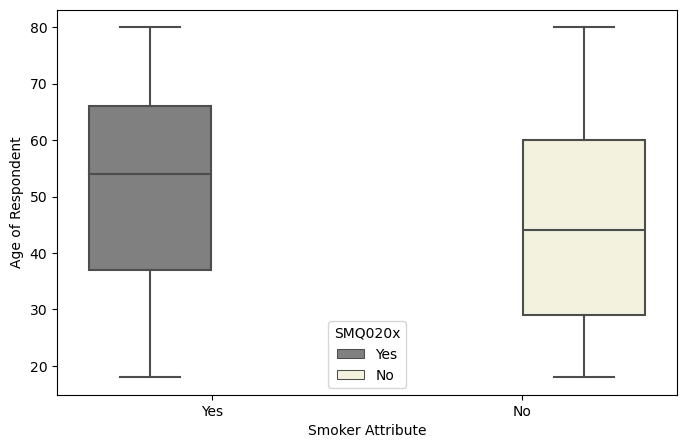

In [22]:
smoking = da[['SMQ020x', 'RIDAGEYR']]

plt.figure(figsize=(8,5))
sns.boxplot(x="SMQ020x", y="RIDAGEYR",
            hue="SMQ020x", palette=["gray", "beige"],
            data=smoking)\
            .set(xlabel='Smoker Attribute', ylabel='Age of Respondent')

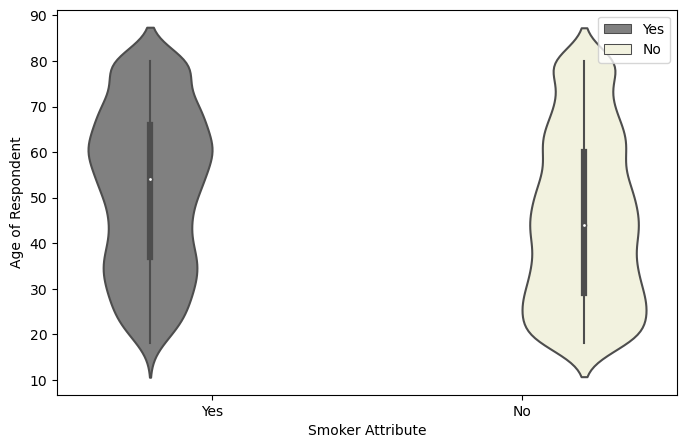

In [23]:
plt.figure(figsize=(8,5))
sns.violinplot(x="SMQ020x", y="RIDAGEYR",
            hue="SMQ020x", palette=["gray", "beige"],
            data=smoking)\
            .set(xlabel='Smoker Attribute', ylabel='Age of Respondent')
plt.legend()

__Q6b.__ Does it appear that uncertainty about the mean age of smokers, or uncertainty about the mean age of non-smokers contributed more to the uncertainty for the mean difference that we are focusing on here?

When referring to uncertainty surrounding the mean difference, we're talking about the width of the difference CI. Because both the standard deviation - used to calculate the pooled/nonpooled variance - and the sample size of non-smokers is higher, non-smokers contribute more to the uncertainty to the mean difference.